In [274]:
data = read.csv("shark_data.csv")
data_index = data[ , 1:9]
head(data_index)
sharks = as_tibble(data_index)
head(sharks)

Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
9/19/06,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
9/26/06,Kaneohe,C. plumbeus,F,90,102,131,NA,NA
9/26/06,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
9/27/06,Kaneohe,C. plumbeus,F,103,113,144,NA,NA
10/4/06,Kaneohe,C. limbatis,M,140,150,190,NA,NA
10/9/06,Kaneohe,C. plumbeus,F,134,142,183,NA,NA


Date,Location,Species,Sex,PCL..cm.,FL,TL,Cin,Cout
9/19/06,Kaneohe,C. plumbeus,M,NA,NA,NA,NA,NA
9/26/06,Kaneohe,C. plumbeus,F,90,102,131,NA,NA
9/26/06,Kaneohe,C. plumbeus,NA,NA,NA,NA,NA,NA
9/27/06,Kaneohe,C. plumbeus,F,103,113,144,NA,NA
10/4/06,Kaneohe,C. limbatis,M,140,150,190,NA,NA
10/9/06,Kaneohe,C. plumbeus,F,134,142,183,NA,NA


In [275]:
sharks <- sharks %>% 
    mutate(Date = as.Date(x=sharks$Date, format="%m/%d/%Y")) %>%
    mutate(FL = as.numeric(as.character(sharks$FL))) %>%
    mutate(Cin = as.numeric(as.character(sharks$Cin))) 

Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”

In [276]:
str(sharks)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	807 obs. of  9 variables:
 $ Date    : Date, format: "0006-09-19" "0006-09-26" ...
 $ Location: Factor w/ 8 levels "Big Island","Ewa",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Species : Factor w/ 18 levels "A. narinari",..: 9 9 9 9 6 9 6 9 9 12 ...
 $ Sex     : Factor w/ 2 levels "F","M": 2 1 NA 1 2 1 2 1 2 1 ...
 $ PCL..cm.: num  NA 90 NA 103 140 134 89 136 114 110 ...
 $ FL      : num  NA 102 NA 113 150 142 99 151 121 120 ...
 $ TL      : num  NA 131 NA 144 190 183 116 188 150 170 ...
 $ Cin     : num  NA NA NA NA NA NA 2.2 NA 17 NA ...
 $ Cout    : num  NA NA NA NA NA NA 6.3 NA 13 NA ...


In [277]:
check_spelling <- function(df, x){
    count(df,x)
}

In [278]:
check_spelling(sharks, "Species")

Species,freq
A. narinari,1
A. superciliosus,2
C. altimus,4
C. galapagensis,26
C. ignobilis,3
C. limbatis,35
C. melanopterus,3
C. oligoporus,1
C. plumbeus,367
D. lata,20


In [242]:
remove_na <- function(df, x){
    df %>%
    drop_na(x)
}

In [243]:
male_sharks <- remove_na(sharks, c(3:9))

In [244]:
run_pca <- function(df){
    prcomp(df, center = TRUE, scale = TRUE)
}

In [245]:
run_pca(male_sharks[ c(5:9)])

Standard deviations (1, .., p=5):
[1] 2.17412833 0.49412968 0.14637787 0.08193551 0.02935896

Rotation (n x k) = (5 x 5):
               PC1        PC2          PC3          PC4          PC5
PCL..cm. 0.4516773  0.3712728 -0.021636422  0.495063186  0.642330499
FL       0.4518160  0.3731404 -0.036748710  0.287939883 -0.756550500
TL       0.4527320  0.3303113 -0.006839089 -0.819166863  0.121848551
Cin      0.4422076 -0.5123050  0.735487825  0.029747966 -0.012990250
Cout     0.4374197 -0.5927570 -0.676159955  0.009152873  0.005201457

In [246]:
male_sharks_pca = run_pca(male_sharks[ ,c(5:9)])

In [247]:
rotation <- function(df){
    df$rotation
}

In [248]:
rotation(male_sharks_pca)

,PC1,PC2,PC3,PC4,PC5
PCL..cm.,0.4516773,0.3712728,-0.021636422,0.495063186,0.642330499
FL,0.4518160,0.3731404,-0.036748710,0.287939883,-0.756550500
TL,0.4527320,0.3303113,-0.006839089,-0.819166863,0.121848551
Cin,0.4422076,-0.5123050,0.735487825,0.029747966,-0.012990250
Cout,0.4374197,-0.5927570,-0.676159955,0.009152873,0.005201457


In [249]:
sdev2 <- function(df){
    df$sdev^2
}

In [250]:
sdev2(male_sharks_pca)

[1] 4.7268340001 0.2441641436 0.0214264802 0.0067134276 0.0008619485

In [251]:
rotation2 <- function(df){
    df$rotation[2,1]
}

In [252]:
rotation2(male_sharks_pca)

[1] 0.451816

In [253]:
create_biplot <- function(df){
    library(factoextra)
    fviz_pca_biplot(df)
}

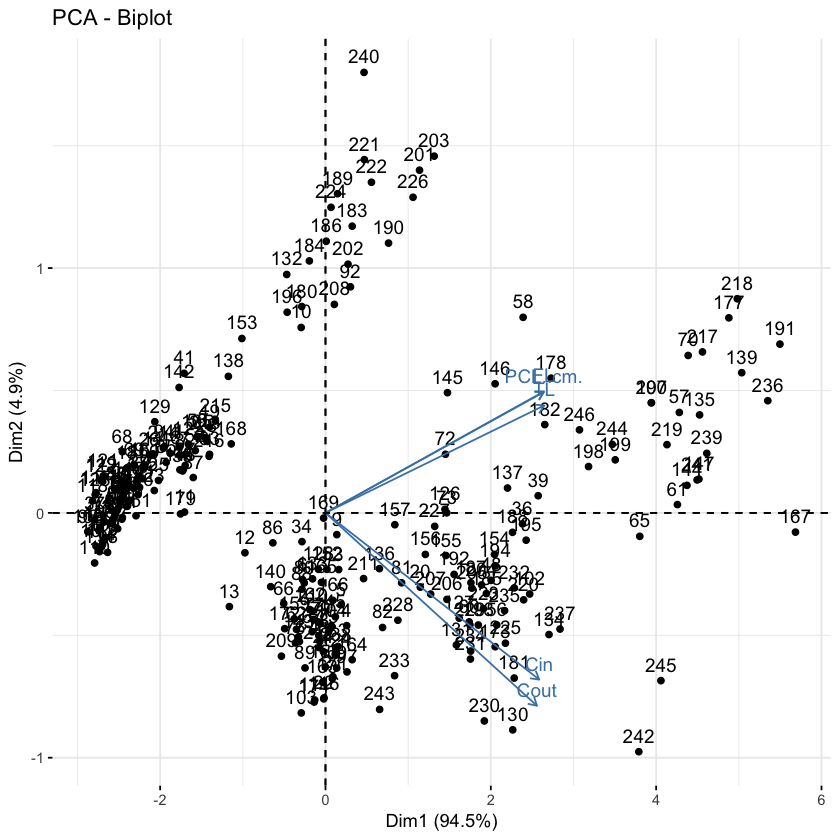

In [254]:
create_biplot(male_sharks_pca)

In [255]:
create_biplot_Color <- function(df, data, x){
    library(ggfortify)
    autoplot(df, data, colour = x, 
    loadings = TRUE, loadings.color = "blue",
    loadings.label = TRUE, loadings.label.size = 3)
}

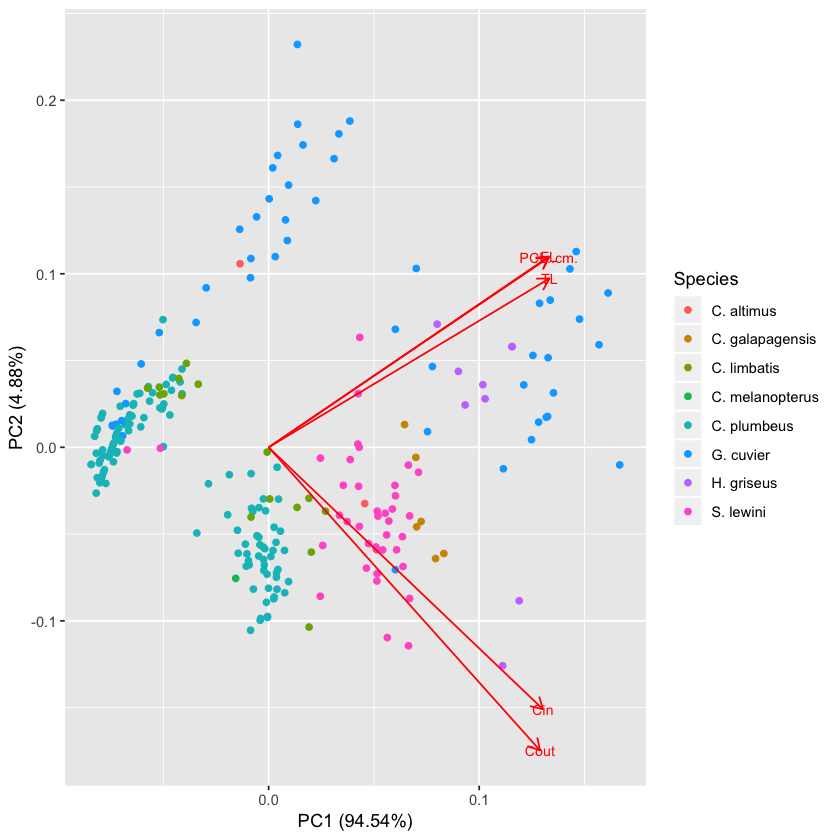

In [256]:
create_biplot_Color(male_sharks_pca, male_sharks, "Species")

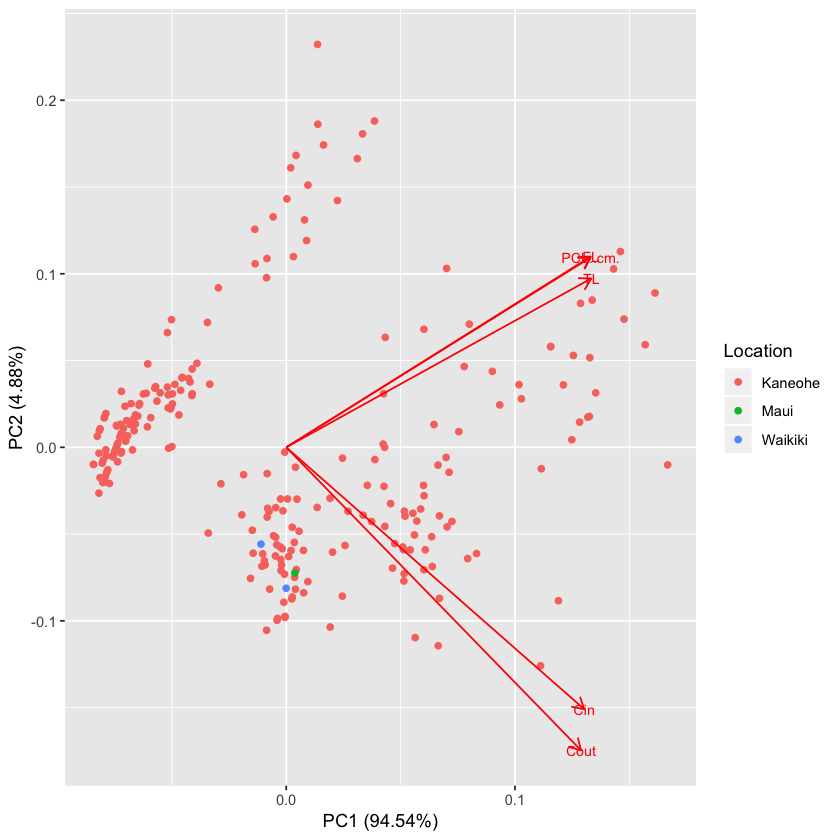

In [257]:
create_biplot_Color(male_sharks_pca, male_sharks, "Location")

In [258]:
female_sharks <- remove_na(sharks, c(3:7))

In [259]:
run_pca(female_sharks[ c(5:7)])

Standard deviations (1, .., p=3):
[1] 1.70837424 0.27588571 0.07310626

Rotation (n x k) = (3 x 3):
               PC1        PC2         PC3
PCL..cm. 0.5701309  0.8211873 -0.02453985
FL       0.5812780 -0.3820990  0.71841231
TL       0.5805744 -0.4238536 -0.69518454

In [267]:
female_sharks_pca = run_pca(female_sharks[ ,c(5:7)])

In [268]:
rotation(female_sharks_pca)

,PC1,PC2,PC3
PCL..cm.,0.5701309,0.8211873,-0.02453985
FL,0.5812780,-0.3820990,0.71841231
TL,0.5805744,-0.4238536,-0.69518454


In [269]:
sdev2(female_sharks_pca)

[1] 2.918542552 0.076112923 0.005344525

In [270]:
rotation2(female_sharks_pca)

[1] 0.581278

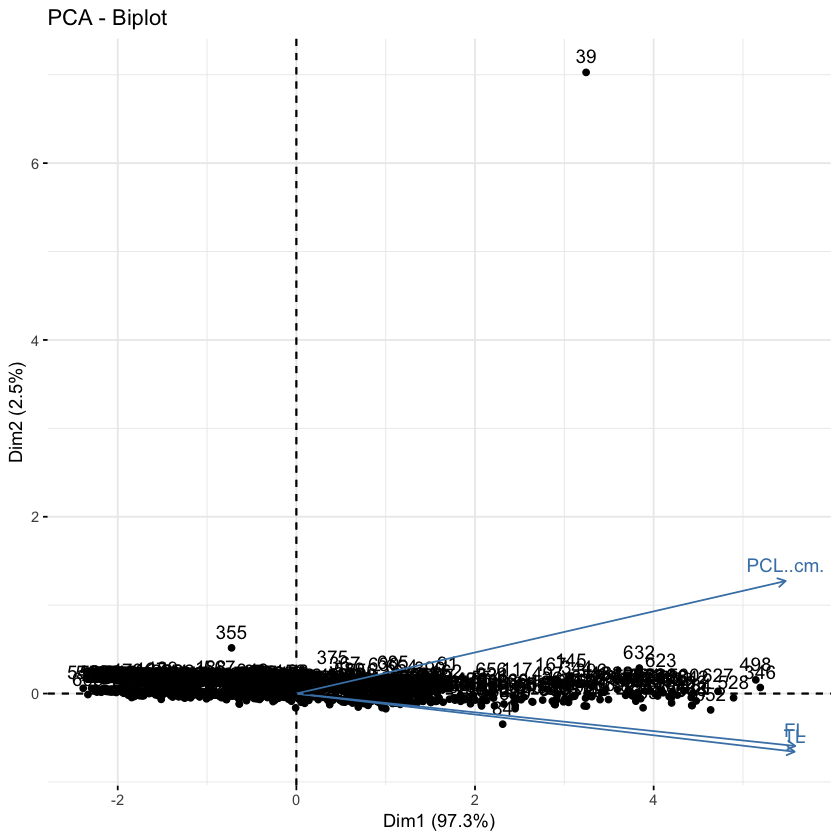

In [271]:
create_biplot(female_sharks_pca)

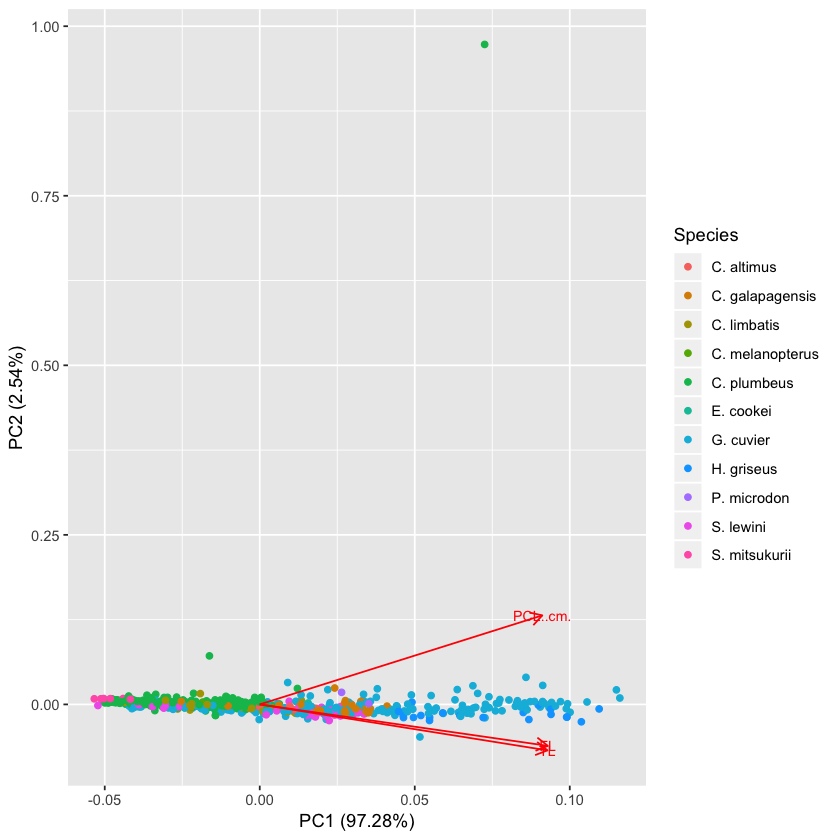

In [273]:
create_biplot_Color(female_sharks_pca, female_sharks, "Species")

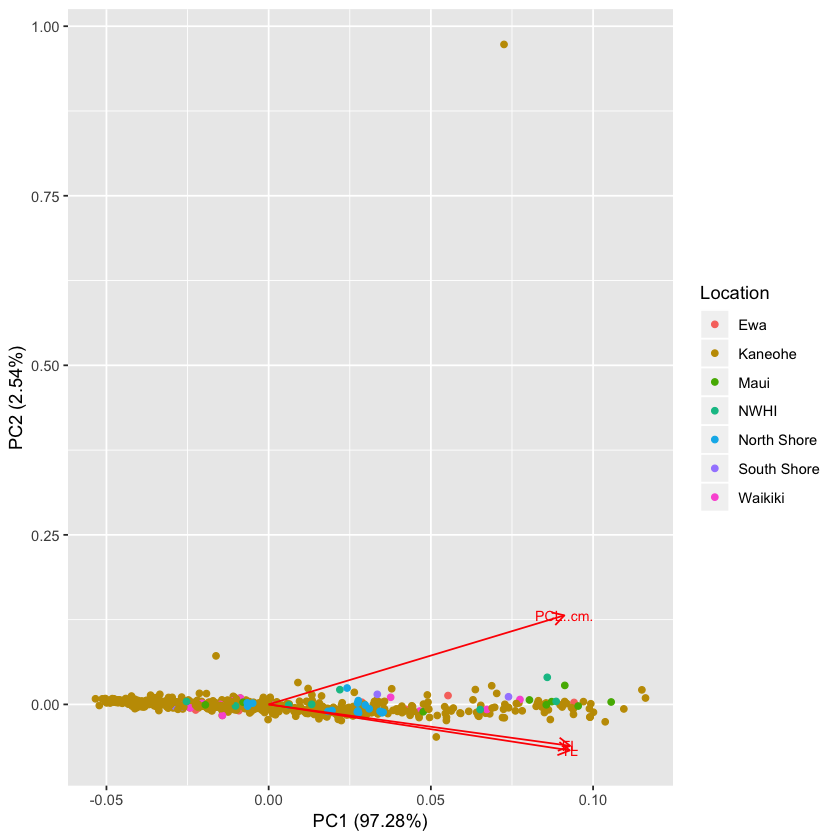

In [272]:
create_biplot_Color(female_sharks_pca, female_sharks, "Location")